In [237]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter, FormatStrFormatter
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"],
    })
plt.rcParams.update({'font.size': 20})


from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import TransformedBbox, BboxPatch, BboxConnector 

def mark_inset(parent_axes, inset_axes, loc1a=1, loc1b=1, loc2a=2, loc2b=2, **kwargs):
    rect = TransformedBbox(inset_axes.viewLim, parent_axes.transData)

    pp = BboxPatch(rect, fill=False, **kwargs)
    parent_axes.add_patch(pp)

    p1 = BboxConnector(inset_axes.bbox, rect, loc1=loc1a, loc2=loc1b, **kwargs)
    inset_axes.add_patch(p1)
    p1.set_clip_on(False)
    p2 = BboxConnector(inset_axes.bbox, rect, loc1=loc2a, loc2=loc2b, **kwargs)
    inset_axes.add_patch(p2)
    p2.set_clip_on(False)

    return pp, p1, p2

# mark_inset(ax, axins, loc1a=1, loc1b=4, loc2a=2, loc2b=3, fc="none", ec="crimson") 

import pandas as pd

def df2np(df, model):
    df = df.loc[df['Model'] == model, ['Data in k','SSIM']]
    return df.to_numpy().T

### Brain

In [285]:
df = pd.read_excel('Brain_results.xlsx')

unet_31M = df2np(df, 'U-Net-31M')
unet_124M = df2np(df, 'U-Net-124M')

vit_32Mp10 = df2np(df, 'ViT-32M/10')
vit_60Mp10 = df2np(df, 'ViT-60M/10')

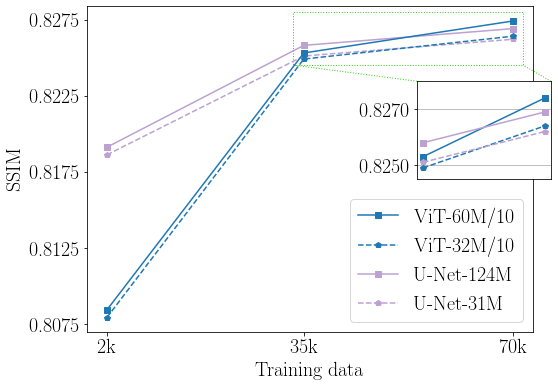

In [289]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(vit_60Mp10[0], vit_60Mp10[1], 's-', color='#1f77b4', label='ViT-60M/10', zorder=4)
ax.plot(vit_32Mp10[0], vit_32Mp10[1], 'p--', color='#1f77b4', label='ViT-32M/10', zorder=2)
ax.plot(unet_124M[0], unet_124M[1], 's-', color='#bca1d1', label='U-Net-124M', zorder=3)
ax.plot(unet_31M[0], unet_31M[1], 'p--', color='#bca1d1', label='U-Net-31M', zorder=1)




ax.legend()
ax.set_ylabel('SSIM')
ax.set_xlabel('Training data')
# plt.grid('on')
ax.set_xticks([2, 35, 70])
ax.set_xticklabels(['2k', '35k', '70k'])
ax.yaxis.set_ticks(np.arange(0.8075, 0.8300, 0.005))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
 # location for the zoomed portion 
axins = ax.inset_axes([.74, .47, .3, .3]) 

# plot the zoomed portion

axins.plot(vit_32Mp10[0,1:], vit_32Mp10[1,1:], 'p--',  color='#1f77b4',)
axins.plot(vit_60Mp10[0,1:], vit_60Mp10[1,1:], 's-',  color='#1f77b4',)
axins.plot(unet_31M[0,1:], unet_31M[1,1:], 'p--',  color='#bca1d1', )
axins.plot(unet_124M[0,1:], unet_124M[1,1:], 's-', color='#bca1d1', )

axins.grid('on')
axins.set_xticks([],)
# axins.set_xticks([35, 70])
# axins.set_xticklabels(['35k', '70k'])
axins.yaxis.set_ticks(np.arange(0.825, 0.828, 0.002))
axins.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
# axins.yaxis.tick_right()
axins.set_ylim([0.8245, 0.8280])

mark_inset(ax, axins, loc1a=1, loc1b=4, loc2a=2, loc2b=3, fc="none", ec="#36d117", linestyle = 'dotted')
plt.savefig('brain_sc4x_performance.pdf', bbox_inches = 'tight')
plt.show()

### Knee

In [281]:
df = pd.read_excel('Knee_results.xlsx')

unet_8M = df2np(df, 'U-Net-8M')
unet_31M = df2np(df, 'U-Net-31M')
unet_124M = df2np(df, 'U-Net-124M')

vit_8Mp10 = df2np(df, 'ViT-8M/10')
vit_8Mp16 = df2np(df, 'ViT-8M/16')
vit_32Mp10 = df2np(df, 'ViT-32M/10')
vit_32Mp16 = df2np(df, 'ViT-32M/16')


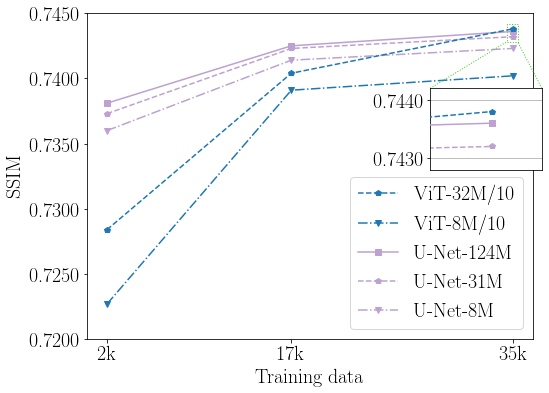

In [283]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(vit_32Mp10[0], vit_32Mp10[1], 'p--', color='#1f77b4', label='ViT-32M/10', zorder=7)
# ax.plot(vit_32Mp16[0], vit_32Mp16[1], 'p--', color='#1fb59c', label='ViT-32M/16', zorder=2)
ax.plot(vit_8Mp10[0], vit_8Mp10[1], 'v-.', color='#1f77b4', label='ViT-8M/10', zorder=2)
# ax.plot(vit_8Mp16[0], vit_8Mp16[1], 'v-.', color='#1fb59c', label='ViT-8M/16', zorder=2)
ax.plot(unet_124M[0], unet_124M[1], 's-', color='#bca1d1', label='U-Net-124M', zorder=3)
ax.plot(unet_31M[0], unet_31M[1], 'p--', color='#bca1d1', label='U-Net-31M', zorder=1)
ax.plot(unet_8M[0], unet_8M[1], 'v-.', color='#bca1d1', label='U-Net-8M', zorder=1)




ax.legend()
ax.set_ylabel('SSIM')
ax.set_xlabel('Training data')
# plt.grid('on')
ax.set_xticks([2, 17, 35])
ax.set_xticklabels(['2k', '17k', '35k'])
ax.yaxis.set_ticks(np.arange(0.72, 0.745, 0.005))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))

 # location for the zoomed portion 
axins = ax.inset_axes([.77, .52, .25, .25]) 

# plot the zoomed portion
axins.plot(vit_32Mp10[0], vit_32Mp10[1], 'p--', color='#1f77b4', label='ViT-32M/10', zorder=7)
axins.plot(unet_124M[0], unet_124M[1], 's-', color='#bca1d1', label='U-Net-124M', zorder=3)
axins.plot(unet_31M[0], unet_31M[1], 'p--', color='#bca1d1', label='U-Net-31M', zorder=1)

axins.grid('on')
axins.set_xticks([],)
# axins.set_xticks([35])
# axins.set_xticklabels(['35k'])
# axins.set_yticks([],)
axins.yaxis.set_ticks(np.arange(0.743, 0.745, 0.001))
axins.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
# axins.yaxis.tick_right()
axins.set_xlim([34.5, 35.4])
axins.set_ylim([0.7428, 0.7442])

mark_inset(ax, axins, loc1a=1, loc1b=4, loc2a=2, loc2b=3, fc="none", ec="#36d117", linestyle = 'dotted')

plt.savefig('knee_sc4x_performance.pdf', bbox_inches = 'tight')
plt.show()